# **PROYECTO DE VISIÓN POR COMPUTADOR: DETECCIÓN DE RESIDUOS**

El objetivo principal de este proyecto es estimar automáticamente la contaminación por residuos en el Canal Bogotá de la ciudad de Cúcuta mediante visión artificial.

**Conjunto de datos**

Se creo un conjunto de imágenes propio compuesto por 1340 imágenes en formato "jpg", estas imágenes contienen residuos de distintos tipos.

**Tratamiento de los datos**

Las imágenes fueron redimensionadas por medio del siguiente código, utilizando técnicas de procesamiento de imágenes por medio de la librería OpenCV.

In [ ]:
#Este código se ejecuto desde el editor de código Visual Studio Code
import os
import cv2

# Ruta de la carpeta que contiene las imágenes originales
carpeta_originales = 'Adicional'

# Carpeta donde se guardarán las imágenes redimensionadas
carpeta_redimensionadas = 'Adicional224'

# Crear la carpeta de imágenes redimensionadas si no existe
os.makedirs(carpeta_redimensionadas, exist_ok=True)

# Tamaño de destino para redimensionar las imágenes
nuevo_ancho = 224
nuevo_alto = 224

# Iterar sobre los archivos en la carpeta de imágenes originales
for archivo in os.listdir(carpeta_originales):
    # Obtener la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_originales, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones si es necesario)
    if archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Leer la imagen
        imagen = cv2.imread(ruta_archivo)

        # Verificar que la imagen se haya leído correctamente
        if imagen is not None:
            # Redimensionar la imagen a un nuevo tamaño
            imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))

            # Guardar la imagen redimensionada en la carpeta de imágenes redimensionadas
            ruta_salida = os.path.join(carpeta_redimensionadas, archivo)
            cv2.imwrite(ruta_salida, imagen_redimensionada)

        else:
            print(f"Error al leer la imagen: {ruta_archivo}")

print("Proceso completado. Imágenes redimensionadas guardadas en la carpeta de salida.")

Una vez completado el proceso de redimensionamiento de las imágenes se continua con el proceso de etiquetado de las imágenes, en el cual, se selecciono manualmente la presencia de todos los distintos tipos de basura o residuos en las imágenes, este proceso es muy importante ya que estos serán los datos de entrada para el entrenamiento de las arquitecturas de detección de objetos.

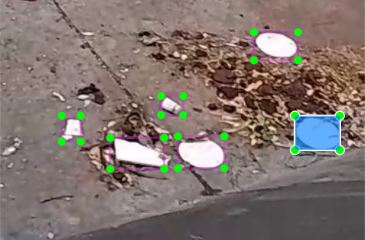

**Manejo de Tensorflow y Keras**

In [ ]:
import os

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('training_demo'),
    #'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    #'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('training_demo','annotations'),
    'IMAGE_PATH': os.path.join('training_demo','images'),
    'MODEL_PATH': os.path.join('training_demo','models'),
    'EXPORTED_PATH': os.path.join('training_demo','exported_models'),
    'PRETRAINED_MODEL_PATH': os.path.join('training_demo','pre-trained-models')
    #'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    #'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    #'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    #'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    #'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0


In [ ]:
!pip install tensorflow==2.9.1
#!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


**Clonando el repositorio de modelos de tensorflow**

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 88134, done.
remote: Counting objects: 100% (1846/1846), done.
remote: Compressing objects: 100% (766/766), done.
remote: Total 88134 (delta 1210), reused 1646 (delta 1062), pack-reused 86288
Receiving objects: 100% (88134/88134), 603.02 MiB | 31.25 MiB/s, done.
Resolving deltas: 100% (63108/63108), done.


In [ ]:
pwd

'/content'

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

**Clonando la API de coco**

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 27.73 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Verificando la correcta instalación de los diversos paquetes**

In [ ]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2023-10-26 01:55:07.001586: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 01:55:07.001644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 01:55:07.001690: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 01:55:08.182521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-10-26 01:55:13.883347: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting b

**Importando a google colab los archivos de entrenamiento y evaluación desde google drive**

In [ ]:
# Copiamos los archivos que necesitamos para el entrenamiento
# Reemplaza la dirección con tu propio dirección de archivo de google drive (/content/drive/My Drive/Desarrollos/Hand Detection/)
!cp -r "/content/drive/My Drive/archivos_record/train" "/content/training_demo/images"
!cp -r "/content/drive/My Drive/archivos_record/test" "/content/training_demo/images"
!cp -r "/content/drive/My Drive/archivos_record/train.record" "/content/training_demo/annotations"
!cp -r "/content/drive/My Drive/archivos_record/test.record" "/content/training_demo/annotations"
!cp -r "/content/drive/My Drive/archivos_record/label_map.pbtxt" "/content/training_demo/annotations"

**Descargando una arquitectura pre-entrenada de Deep Learning**

In [ ]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


**Arquitectura ssd_mobilenet_v2**

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2023-10-26 01:59:04--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.107.207, 74.125.196.207, 74.125.134.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.107.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M   148MB/s    in 0.3s    

2023-10-26 01:59:04 (148 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



**Arquitectura ssd_mobilenet_v2_fpnlite**

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2023-10-25 02:52:45--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.2.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2023-10-25 02:52:46 (172 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



**Arquitectura ssd_mobilenet_v2**

In [ ]:
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


**Arquitectura ssd_mobilenet_v2_fpnlite**

In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
pwd

'/content/training_demo/pre-trained-models'

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!cp -r "/content/drive/MyDrive/archivos_record/exported-models/ssd_mobnet_v2_fpnlite/ssd_mobnet_v2_fpnlite" "/content/training_demo/exported_models"

In [ ]:
!cp -r "/content/drive/MyDrive/archivos_record/exported-models/ssd_mobnet_v2" "/content/training_demo"

In [ ]:
!cp -r "/content/training_demo/exported_models" "/content/drive/MyDrive/archivos_record/exported-models/ssd_resnet50_v1_fpn"

In [ ]:
!cp -r "/content/training_demo/exported_models" "/content/drive/MyDrive/archivos_record/exported-models/ssd_mobnet_v2"

**Entrenamiento de un modelo de detección mediante Tensorflow**

In [ ]:
#entrenamiento con tensorflow
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_mobnet_v2 --pipeline_config_path=/content/training_demo/models/my_ssd_mobnet_v2/pipeline.config

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrINS5_4

In [ ]:
cd /content/training_demo/models/my_ssd_mobnet_v2_fpnlite/train

/content/training_demo/models/my_ssd_mobnet_v2_fpnlite/train


In [ ]:
cd ..

/content


**Evaluando modelos en Tensorflow utilizando la API de coco**

In [ ]:
#evaluar el modelo resnet
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_mobnet_v2 --pipeline_config_path=/content/training_demo/models/my_ssd_mobnet_v2/pipeline.config --checkpoint_dir=/content/training_demo/models/my_ssd_mobnet_v2

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrINS5_4

In [ ]:
#evaluar el modelo
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_mobnet_v2_fpnlite --pipeline_config_path=/content/training_demo/models/my_ssd_mobnet_v2_fpnlite/pipeline.config --checkpoint_dir=/content/training_demo/models/my_ssd_mobnet_v2_fpnlite

2023-10-25 03:26:28.265044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
W1025 03:26:32.429065 133370632524416 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1025 03:26:32.429339 133370632524416 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1025 03:26:32.429444 133370632524416 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1025 03:26:32.429537 133370632524416 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1025 03:26:32.429658 133370632524416 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-10-25 03:26:33.890950: W tensorflow/core/common_runtime/gpu/gpu_bfc_alloca

In [ ]:
cd /content/training_demo/models/my_ssd_mobnet_v2_fpnlite/train

[Errno 2] No such file or directory: '/content/training_demo/models/my_ssd_mobnet_v2_fpnlite/train'
/content


In [ ]:
#evaluar el modelo con tensorboard
#!tensorboard --logdir=.
%tensorboard --logdir logs/

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
pwd

'/content/training_demo'

In [ ]:
cd ..

/content


***EXPORTAR MODELO***

In [ ]:
!python exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=/content/training_demo/models/my_ssd_mobnet_v2/pipeline.config --trained_checkpoint_dir=/content/training_demo/models/my_ssd_mobnet_v2 --output_directory=/content/training_demo/exported_models

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrINS5_4

In [ ]:
#exportar el modelo entrenado
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_mobnet_v2_fpnlite/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_mobnet_v2_fpnlite --output_directory /content/training_demo/exported_models/my_model

In [ ]:
#exportar el modelo entrenado
!python exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=/content/training_demo/models/my_ssd_mobnet_v2_fpnlite/pipeline.config --trained_checkpoint_dir=/content/training_demo/models/my_ssd_mobnet_v2_fpnlite --output_directory=/content/training_demo/exported_models/my_model

***Test your trained Object Detection model on images***

In [ ]:
cd /content/models/research/object_detection

/content/models/research/object_detection


**Cargando un modelo previamente exportado**

In [ ]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/content/training_demo/exported_models/my_model/saved_model"
print('Loading model...', end='')


Loading model...

***Metricas de evaluación***

***Matriz de confusión***

In [ ]:
#matrix_confusion en ssd_mobnet_v2
!python confusion_matrix_tf2.py --input_tfrecord_path=/content/training_demo/annotations/test.record --inference_graph=/content/training_demo/exported_models/saved_model --class_labels=/content/training_demo/annotations/label_map.pbtxt --output_path=/content/training_demo/confusion_matrix/matriz_de_confusion.csv

/content/training_demo/annotations/test.record
Loading model...
2023-10-26 03:57:58.181314: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Evaluating model...
| |                                             #                        | 278 Elapsed Time: 0:00:04
Processed 279 images
Saving confusion matrix...

Confusion Matrix:
[[794. 315.]
 [160.   0.]] 

   category  precision_@0.5IOU  recall_@0.5IOU
0  Residuos           0.832285         0.71596
Done!


In [ ]:
!python confusion_matrix_tf2.py --input_tfrecord_path=/content/training_demo/annotations/test.record --inference_graph=/content/training_demo/exported-models/saved_model --class_labels=/content/training_demo/annotations/label_map.pbtxt --output_path=/content/training_demo/confusion_matrix/matriz_de_confusion.csv


2023-10-08 05:24:27.433545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-08 05:24:27.433604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-08 05:24:27.433648: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-08 05:24:29.068541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/training_demo/annotations/test.record
Loading model...
2023-10-08 05:24:34.089837: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment vari

In [ ]:
import pandas as pd

# Lee el archivo CSV de la matriz de confusión
confusion_matrix = pd.read_csv('/content/training_demo/confusion_matrix/matriz_de_confusion.csv')

# Muestra la matriz de confusión
print(confusion_matrix)


   Unnamed: 0  category  precision_@0.5IOU  recall_@0.5IOU
0           0  Residuos           0.926174        0.622182




***Calculo de metricas de evaluación a partir de la matriz de confusión utilizando la librería sklearn.metrics***

Categoría: Residuos
Precisión: 0.8323
Recuperación: 0.7160
F1-Score: 0.7698


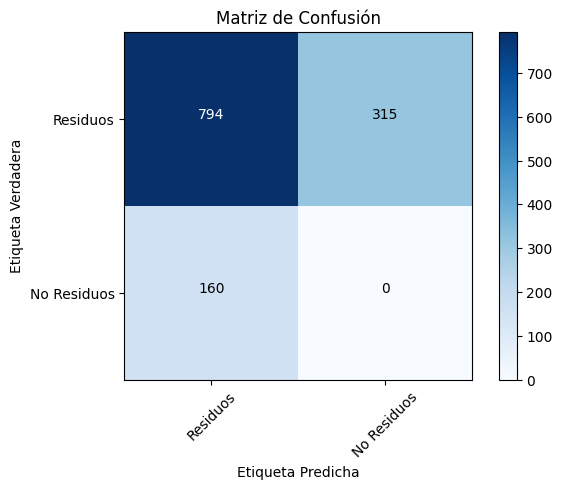

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Cargar la matriz de confusión desde el archivo CSV
confusion_df = pd.read_csv('/content/training_demo/confusion_matrix/matriz_de_confusion.csv')

# Extraer valores de precisión, recuperación y etiquetas de categoría
precision = confusion_df['precision_@0.5IOU'][0]
recall = confusion_df['recall_@0.5IOU'][0]
category = confusion_df['category'][0]
f1 = 2 * (precision * recall) / (precision + recall)

# Imprimir las métricas
print(f'Categoría: {category}')
print(f'Precisión: {precision:.4f}')
print(f'Recuperación: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Crear la matriz de confusión
confusion_matrix_data = np.array([[794, 315], [160, 0]])  # Reemplaza esto con los valores de tu matriz de confusión

# Crear una gráfica de matriz de confusión
plt.imshow(confusion_matrix_data, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = ['Residuos', 'No Residuos']  # Reemplaza con las clases relevantes de tu modelo
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion_matrix_data.max() / 2.
for i, j in itertools.product(range(confusion_matrix_data.shape[0]), range(confusion_matrix_data.shape[1])):
    plt.text(j, i, format(confusion_matrix_data[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_matrix_data[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

En total se entrenaron tres arquitecturas de detección, Faster R-CNN, SSD MobileNet V2 y SSD MobileNet V2 FPNLite.

**Gráficos de pérdida**

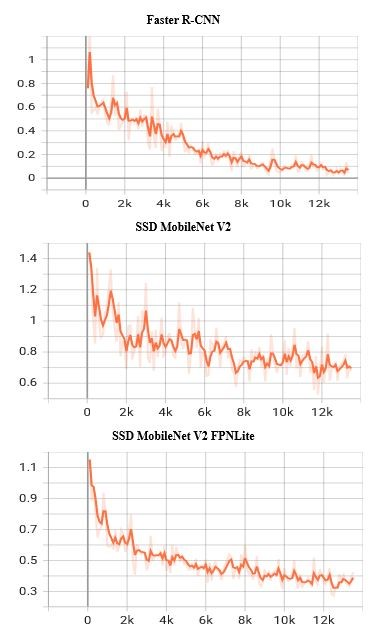

**Matrices de confusión**

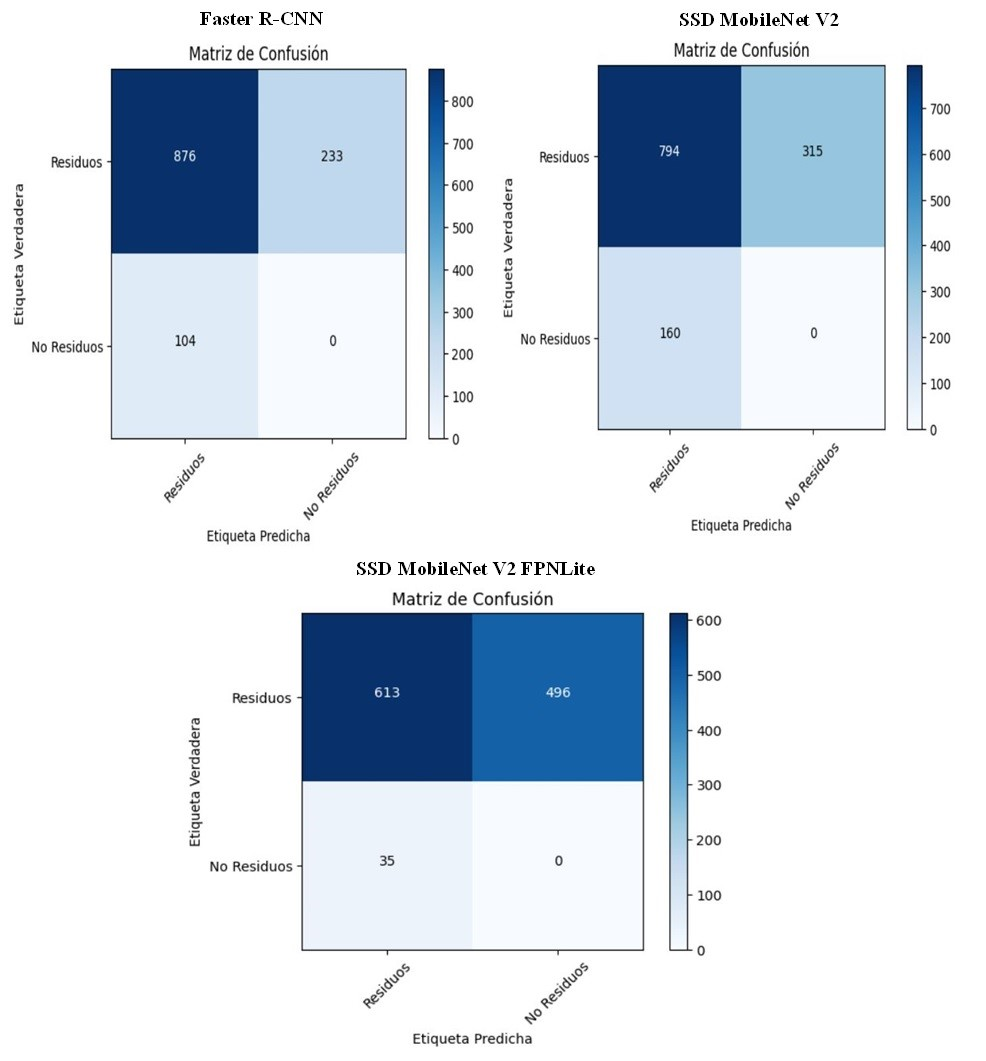

**Implementación de las arquitecturas entrenadas de detección de residuos**

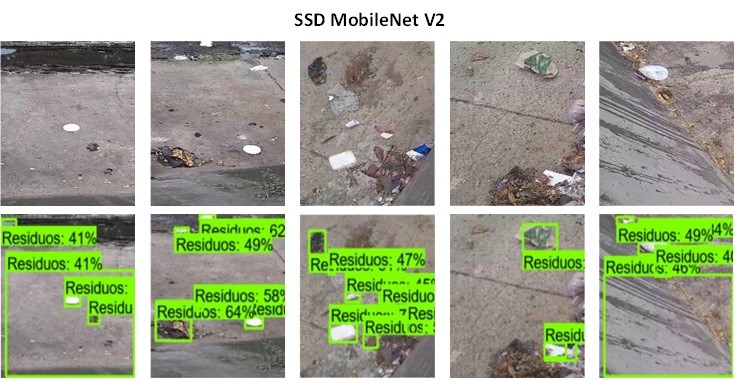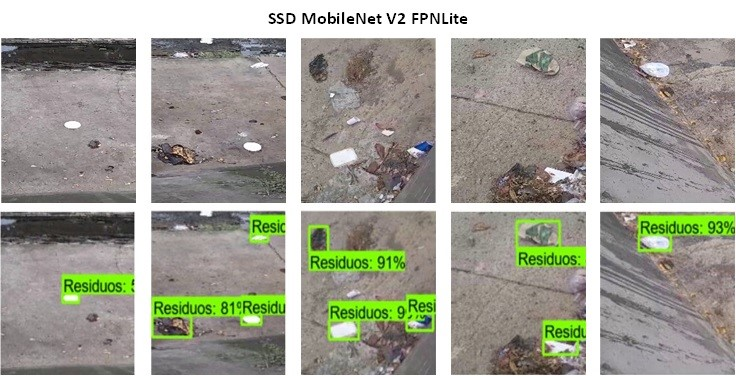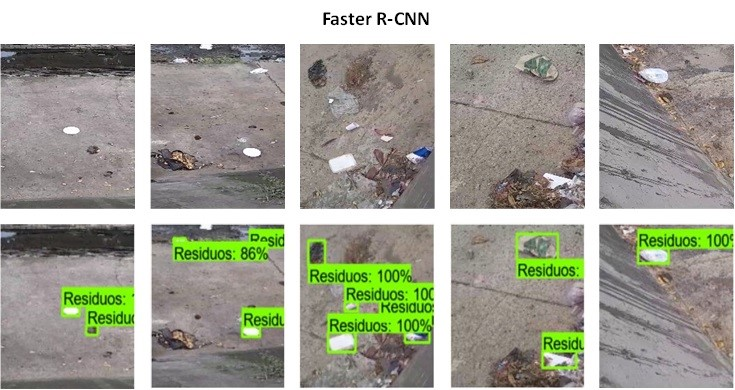

**Resumen del rendimiento de los tres modelos desarrollados**

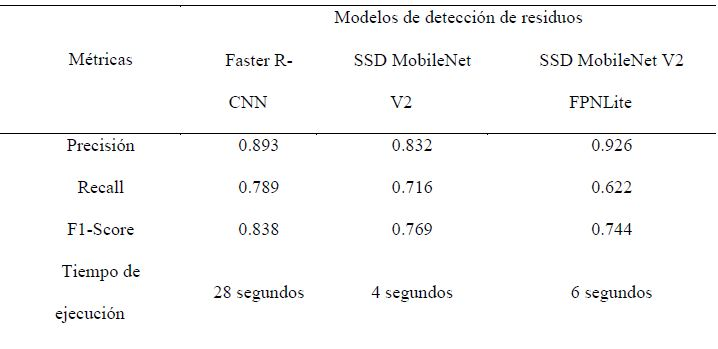

**Diseño del script de python para el cálculo del área contaminada por residuos por medio de técnicas de procesamiento digital de imágenes**

In [ ]:
import cv2
import numpy as np

#imagen_entrada = cv2.imread('C:/Users/equipo/Documents/crhistian/Proyecto/Dataset_Final/test/20230831_170428.jpg')
imagen_entrada = cv2.imread('C:/Users/equipo/Documents/crhistian/Proyecto/Dataset_Final/test/180529imagen_330.jpg')
#Identificación de los residuos mediante segmentación por color
imagen_filtrada = cv2.bilateralFilter(imagen_entrada, 15, 140, 140)
imagen_hsv = cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2HSV)
blanco_inferior = np.array([0, 0, 200])
blanco_superior = np.array([255, 45, 255])
azul_inferior = np.array([100, 50, 50])
azul_superior = np.array([270, 255, 255])
rojo_inferior = np.array([0, 146, 110])
rojo_superior = np.array([30, 217, 243])
mascara_blanca = cv2.inRange(imagen_hsv, blanco_inferior, blanco_superior)
mascara_azul = cv2.inRange(imagen_hsv, azul_inferior, azul_superior)
mascara_roja = cv2.inRange(imagen_hsv, rojo_inferior, rojo_superior)
mask = cv2.bitwise_or(mascara_blanca, mascara_azul)
mask = cv2.bitwise_or(mask, mascara_roja)
imagen_salida = cv2.bitwise_and(imagen_filtrada, imagen_filtrada, mask=mask)
filtro = cv2.GaussianBlur(imagen_salida, (5, 5), 0)
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray, 35, 255, cv2.THRESH_BINARY)
#Operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)
dilatacion = cv2.dilate(binary, kernel, iterations=1)
erosion = cv2.erode(dilatacion, kernel, iterations=1)
cierre = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)
# Conteo de píxeles del objeto, countNonZero()  devuelve el número de píxeles distintos de cero
num_pixeles_objeto = cv2.countNonZero(cierre)
# Área de un solo píxel (suponiendo que la imagen tiene 1 canal)
area_un_pixel = 1.0
# Cálculo del área ocupada por el objeto
area_ocupada_residuo = num_pixeles_objeto * area_un_pixel
# Ingrese las dimensiones de la imagen
ancho=224
alto=224
area_imagen=ancho*alto
porcentaje_residuo=(area_ocupada_residuo*100)/area_imagen

print(f"Área ocupada por el residuo: {area_ocupada_residuo} píxeles.")
print(f"porcentaje ocupado por los residuos: {porcentaje_residuo} %.")
cv2.imshow('Imagen original', imagen_entrada)
cv2.imshow('Imagen segmentada', imagen_salida)
cv2.imshow('Imagen umbralizada', cierre)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Código de programación para implementar el modelos computacional (Arquitectura de detección de residuos y algoritmo para el cálculo del área contaminada por residuos)**

In [ ]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
#IMAGE_SIZE = (6, 4) # Output display size as you want
IMAGE_SIZE = (2, 1) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL= r'C:\Users\equipo\modelos\exported-models\ssd_mobnet_v2_fpnlite\saved_model'
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

In [ ]:
#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap(r'C:\Users\equipo\modelos\annotations\label_map.pbtxt',use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

In [ ]:
def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

In [ ]:
def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\170611imagen_780.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\170612imagen_450.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180510imagen_510.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180510imagen_1140.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180511imagen_90.jpg'
#image_path = r'C:\Users\equipo\modelos\images\test\20230831_170443.jpg'
image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\042716imagen_1110.jpg'
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

**Implementación del proyecto**

El proyecto se implemento en un trayecto de 30 metros del Canal Bogotá de la ciudad de Cúcuta, Norte de Santander por medio de 40 imágenes tomadas en el sitio. Este proyecto desarrollado tiene la capacidad de identificar el número de residuos presentes por imágenes y estima el nivel de contaminación por estos residuos en cada imagen.

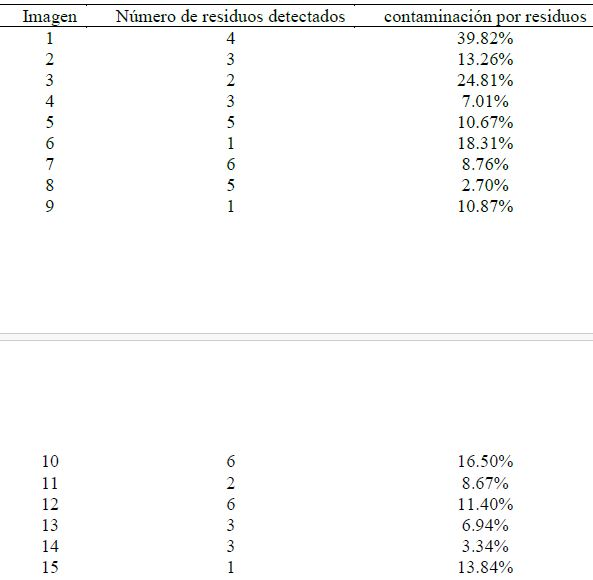

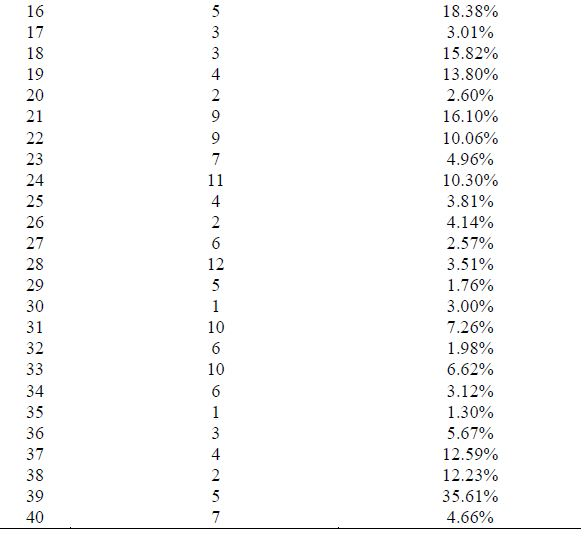